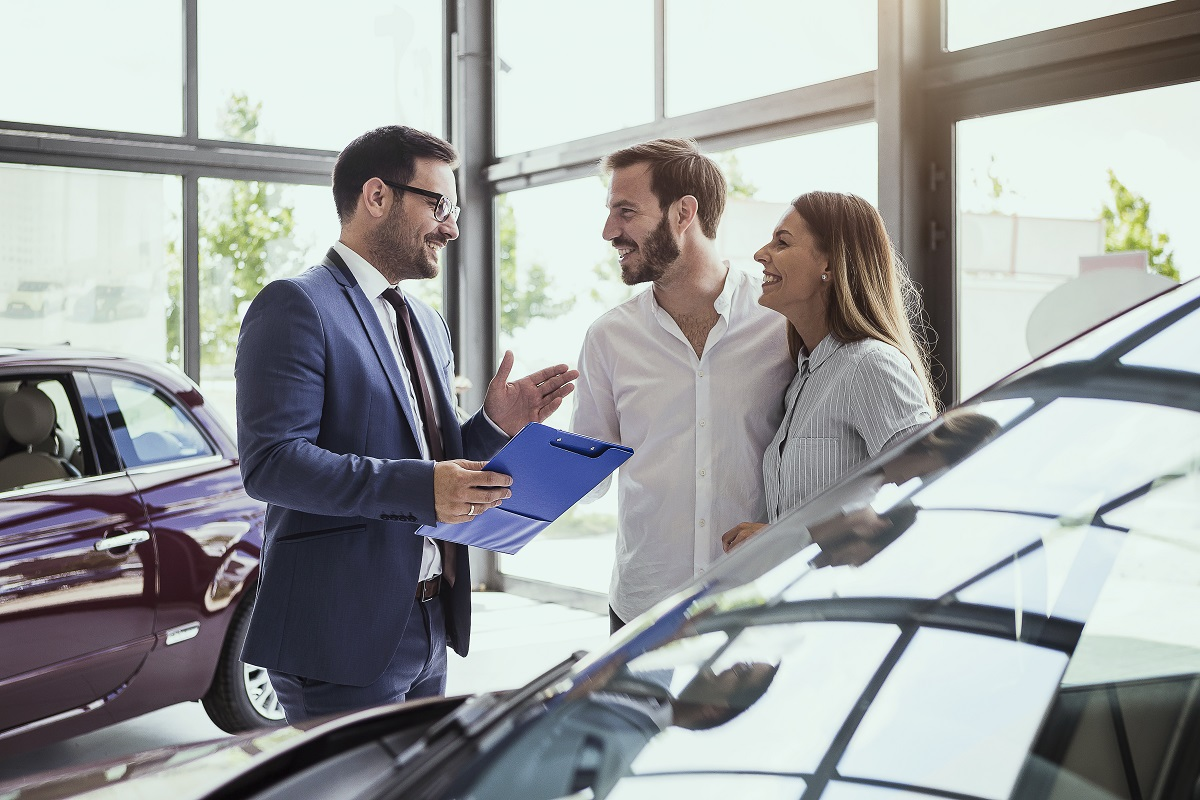

### INTRODUCTION

In today's dynamic and competitive automotive industry, dealerships strive to optimize their sales performance and maintain a competitive edge in the market. With rapidly changing consumer preferences, evolving market trends, and increasing competition, dealerships face the constant challenge of maximizing sales revenue while providing exceptional customer service.

This project aims to analyze sales data from a dealership over a specified time period to gain insights into various aspects of sales performance, customer preferences, and market trends. By leveraging comprehensive EDA techniques, we seek to uncover valuable insights that can inform strategic decision-making, drive revenue growth, and enhance overall business performance.

### ABOUT DATA SET

This dataset contains information on car sales from a car dealership over the course of a year. The dataset includes the following columns:

-- Date: The date of the car sale

-- Salesperson: The name of the salesperson who made the sale
    
-- Customer Name: The name of the customer who purchased the car

-- Car Make: The make of the car that was purchased

-- Car Model: The model of the car that was purchased

-- Car Year: The year of the car that was purchased

-- Sale Price: The sale price of the car in USD

-- Commission Rate: The commission rate paid to the salesperson on the sale

-- Commission Earned: The amount of commission earned by the salesperson on the sale

In [1]:
## importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
## reading the data

df =pd.read_csv('car_sales_data.csv')
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,01/08/2022,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,15/03/2023,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,29/04/2023,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,04/09/2022,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,16/06/2022,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


#### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Date               1048575 non-null  object 
 1   Salesperson        1048575 non-null  object 
 2   Customer Name      1048575 non-null  object 
 3   Car Make           1048575 non-null  object 
 4   Car Model          1048575 non-null  object 
 5   Car Year           1048575 non-null  int64  
 6   Sale Price         1048575 non-null  int64  
 7   Commission Rate    1048575 non-null  float64
 8   Commission Earned  1048575 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 72.0+ MB


In [4]:
df.isnull().sum()

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(1048575, 9)

In [7]:
df.describe()

,Car Year,Sale Price,Commission Rate,Commission Earned
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.015995e+03,3.001837e+04,9.995861e-02,3.000824e+03
std,3.740360e+00,1.154381e+04,2.886096e-02,1.480912e+03
min,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02
25%,2.013000e+03,2.003000e+04,7.493990e-02,1.822280e+03
50%,2.016000e+03,3.000900e+04,9.996744e-02,2.741750e+03
75%,2.019000e+03,4.003200e+04,1.249475e-01,3.978925e+03
max,2.022000e+03,5.000000e+04,1.500000e-01,7.494530e+03


The average sales price is 30,018.37 dollars as the standard deviation is 11,543.807 dollars. This means that the sales prices exhibit a considerable degree of variability thus sales prices are widely spread out from the average; some sales prices are significantly higher or lower than the average sales price of $30,018.37. This variability indicates that there is a range of prices, rather than all sales being close to the average.

In [8]:
df.columns

Index(['Date', 'Salesperson', 'Customer Name', 'Car Make', 'Car Model',
       'Car Year', 'Sale Price', 'Commission Rate', 'Commission Earned'],
      dtype='object')

In [9]:
df.dtypes

Date                  object
Salesperson           object
Customer Name         object
Car Make              object
Car Model             object
Car Year               int64
Sale Price             int64
Commission Rate      float64
Commission Earned    float64
dtype: object

In [10]:
##changing date time data type
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [11]:
df.dtypes

Date                 datetime64[ns]
Salesperson                  object
Customer Name                object
Car Make                     object
Car Model                    object
Car Year                      int64
Sale Price                    int64
Commission Rate             float64
Commission Earned           float64
dtype: object

In [12]:
###extracting month from date

df['Month'] =df['Date'].dt.month


In [13]:
###extracting year from date

df['Year'] =df['Date'].dt.year

In [14]:
### Best Sales month over time

df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby(['Month', 'Year'])['Sale Price'].sum()
max_sales_month = monthly_sales.idxmax()
print(f"The month with the most sales is {max_sales_month}")


The month with the most sales is (12, 2022)


In [15]:
## checking for the total sales per month over the period

monthly_sales_2022_2023 = df.groupby(['Year', 'Month'])['Sale Price'].sum()
sort = monthly_sales_2022_2023.groupby('Year').apply(lambda x: x.sort_values(ascending=False))
sort

Year  Year  Month
2022  2022  12       2688302487
            10       2669095361
            5        2668774695
            8        2658994559
            7        2654413999
            6        2583247703
            11       2580148833
            9        2572876170
2023  2023  1        2660820994
            3        2656638808
            4        2575361815
            2        2420772909
            5          87068106
Name: Sale Price, dtype: int64

#### Sales Trend over Time

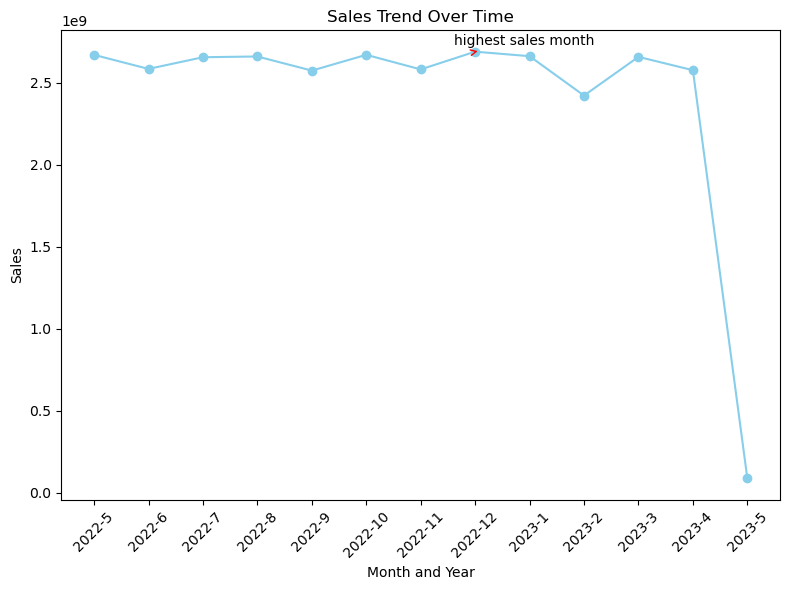

In [16]:
months_years = [(f"{year}-{month}", monthly_sales_2022_2023[(year, month)]) for year, month in sorted(monthly_sales_2022_2023.keys())]
plt.figure(figsize=(8, 6))
plt.plot(*zip(*months_years), marker='o', linestyle='-', color='skyblue')
plt.title('Sales Trend Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)

# Highlighting December as the highest sales month
max_sales_month = max(months_years, key=lambda x: x[1])
plt.annotate( 'highest sales month',xy=max_sales_month, xytext=(-15, 5), textcoords='offset points',
             arrowprops=dict(arrowstyle='<-', color='red'))

plt.tight_layout()
plt.show()

From this visual we can observe that the highest sale was was recorded in December 2022, however sales exhibit relatively consistent levels with occasional fluctuations, except for a significant drop in May 2023.

#### Best 10 Sales Persons vs Bottom 10 Sales Persons

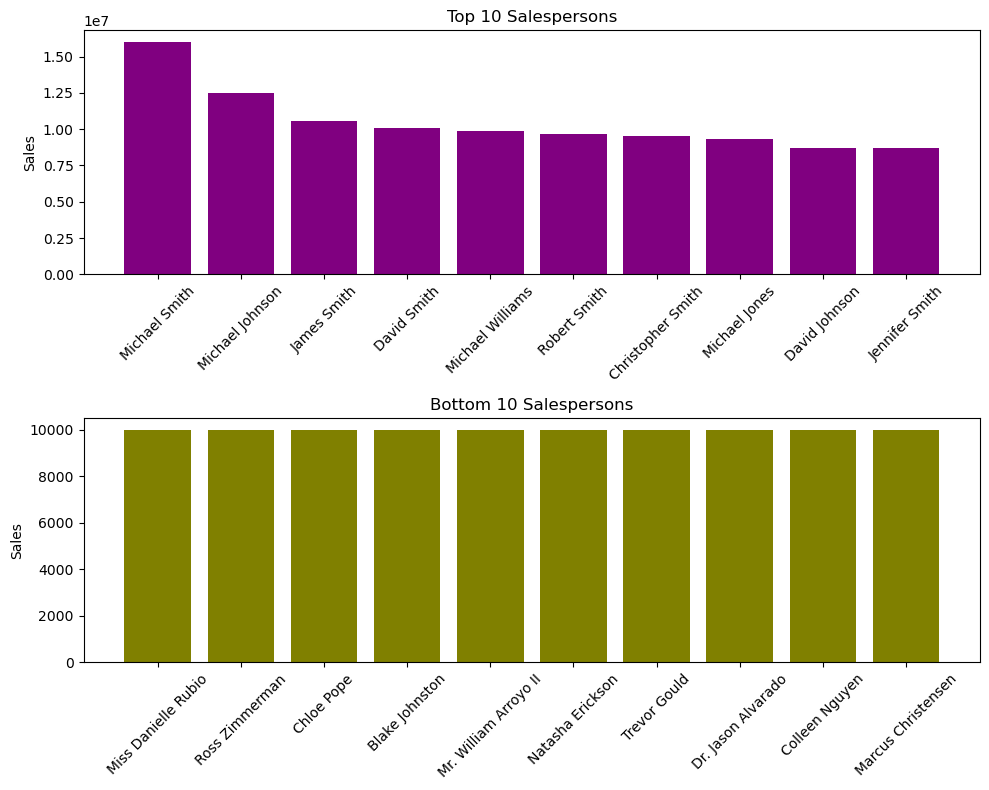

In [17]:

top10 = df.groupby('Salesperson')['Sale Price'].sum().sort_values(ascending=False).head(10)
bottom10 = df.groupby('Salesperson')['Sale Price'].sum().sort_values(ascending=False).tail(10)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot top 10 salespersons
axes[0].bar(top10.index, top10.values, color='purple')
axes[0].set_title('Top 10 Salespersons')
axes[0].set_ylabel('Sales')
axes[0].tick_params(axis='x', rotation=45)

# Plot bottom 10 salespersons
axes[1].bar(bottom10.index, bottom10.values, color='olive')
axes[1].set_title('Bottom 10 Salespersons')
axes[1].set_ylabel('Sales')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()







The top 10 performing salespersons have demonstrated exceptional sales performance, collectively contributing significant revenue to the organization.Total sales figures for this group range from 8.7 million dollars to over 16 million dollars, highlighting their substantial impact on overall sales success.

The bottom 10 performing salespersons have contributed less sales figures.Total sales figures for this group ranges from 10,000 dollars to 10,002 dollars, suggesting a relatively low impact on overall sales success compared to top performers indicating a need for improvement in their sales performance.

### Car With The Most Sales


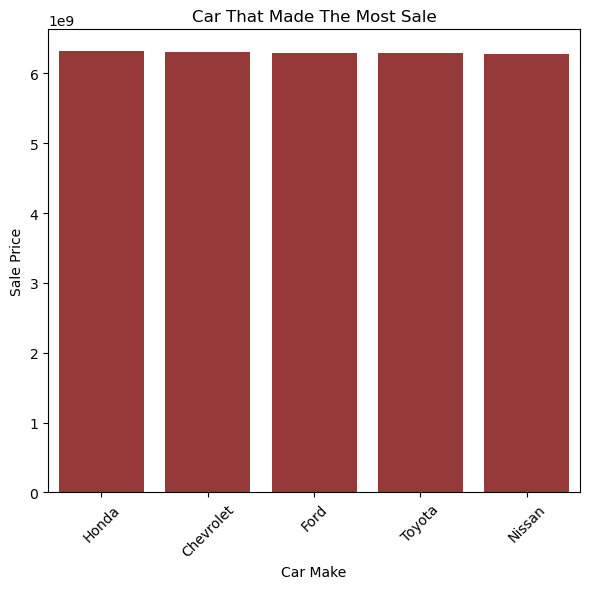

In [28]:
Car_Sales = df.groupby('Car Make')['Sale Price'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(x="Car Make", y="Sale Price", data=Car_Sales, color="brown")
plt.xlabel("Car Make")
plt.ylabel("Sale Price")
plt.title("Car That Made The Most Sale")
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

Honda emerges as the leading car make with total sales reaching $6,314,240,349, closely followed by Chevrolet, Ford, Toyota, and Nissan, all of which boast total sales in the range of billions of dollars.



### Most Preffered Car Model VS Average Sales Price of Car Models.

In [19]:
df['Car Model'].unique()

array(['Altima', 'F-150', 'Civic', 'Silverado', 'Corolla'], dtype=object)

In [20]:
popular_car_models = df['Car Model'].value_counts().sort_values(ascending=False)

# average sale price for each car model
average_sale_price = df.groupby('Car Model')['Sale Price'].mean().sort_values(ascending=False)
print(popular_car_models)
print(average_sale_price)

Car Model
Silverado    210257
Civic        209918
F-150        209643
Corolla      209422
Altima       209335
Name: count, dtype: int64
Car Model
Corolla      30056.046375
Silverado    30022.876152
Altima       30017.174261
Civic        30007.028830
F-150        29988.783656
Name: Sale Price, dtype: float64


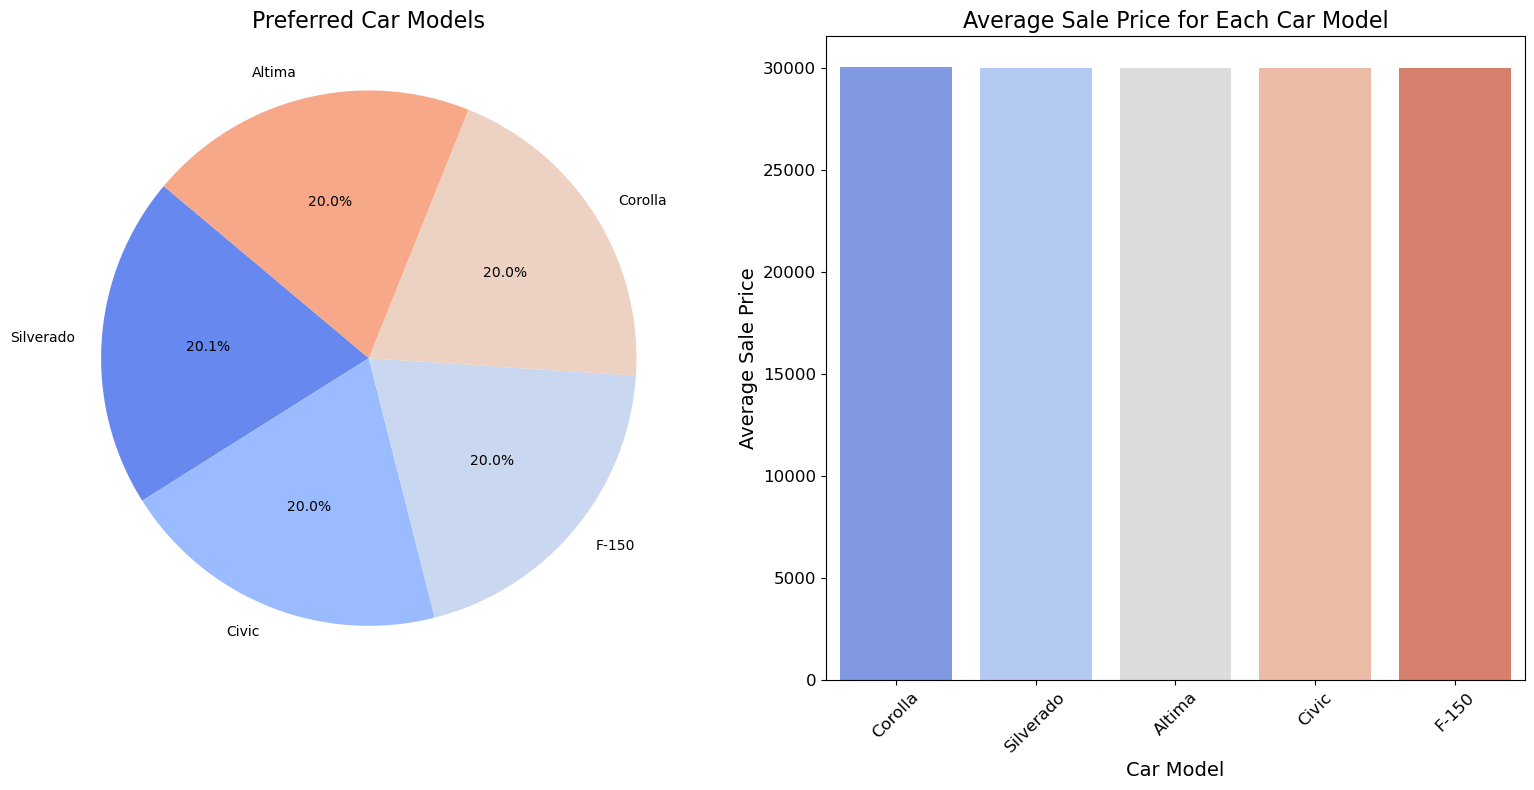

In [21]:

palette = "coolwarm"

plt.figure(figsize=(16, 8))
 ##pie chart
plt.subplot(1, 2, 1)  
plt.pie(popular_car_models, labels=popular_car_models.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette(palette))
plt.title('Preferred Car Models', fontsize=16)  
plt.axis('equal')  
plt.tick_params(labelsize=12)  

# bar chart 
plt.subplot(1, 2, 2)  
sns.barplot(x=average_sale_price.index, y=average_sale_price.values, palette=palette)
plt.title('Average Sale Price for Each Car Model', fontsize=16)  
plt.xlabel('Car Model', fontsize=14)  
plt.ylabel('Average Sale Price', fontsize=14)  
plt.xticks(rotation=45)
plt.tick_params(labelsize=12) 

plt.tight_layout()
plt.show()


Based on the analysis, it is evident that Silverado emerges as the most preferred car model among customers, with a sales count of 210,257 units sold. Following closely behind are the Civic, F-150, Corolla, and Altima models.

Despite Silverado's popularity in terms of sales volume, the Corolla model stands out with the highest average sale price of $30,056.04. This indicates that while Silverado may be the preferred choice among customers in terms of sheer numbers, the Corolla commands a higher price point on average.

It's worth noting that although the Corolla boasts the highest average sale price, its sales count is lower compared to the Silverado, indicating different customer preferences and market dynamics for each model.

### Is there a correlation between  commission rate and commission earned?

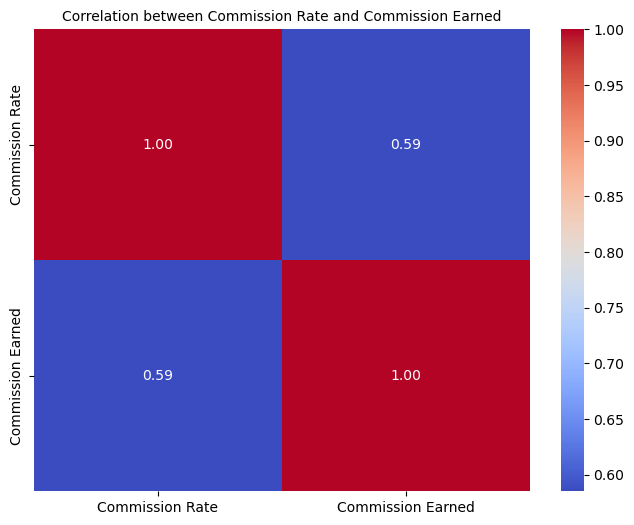

In [22]:
heatmap = ['Commission Rate', 'Commission Earned']


correlation_matrix = df[heatmap].corr()
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Correlation between Commission Rate and Commission Earned', fontsize=10)
plt.show()


A correlation coefficient of 0.59 suggests a moderate positive linear relationship, indicating that as the commission rate increases, the commission earned tends to increase as well, and vice versa.
However, it's important to note that correlation does not imply causation as other factors may be influencing the relationship between commission rate and commission earned, and further analysis would be needed to determine causality.

### Is there a relationship between the car year and the sale price?

In [23]:
cor = df['Car Year'].corr(df['Sale Price']).round(2)
cor

-0.0

<function matplotlib.pyplot.show(close=None, block=None)>

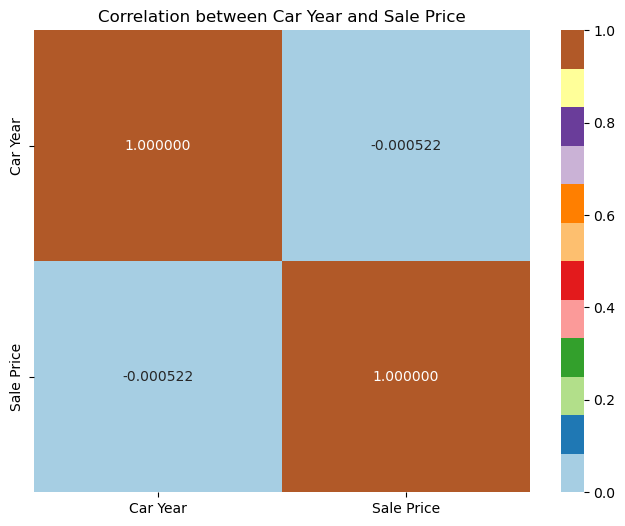

In [24]:

heat_map =['Car Year', 'Sale Price']
correlation = df[heat_map].corr()
plt.figure(figsize =(8,6))
heat_map =sns.heatmap(correlation,annot=True,cmap ='Paired', fmt ='2f')
heat_map.set_title('Correlation between Car Year and Sale Price')
plt.show


This suggests a  very weak negative correlation between car year and sale price, suggesting that the year the car was made does not necessarily affect the sale price of the car. 

#### Top 10 Customers based on Total amount Spent on Car Purchases

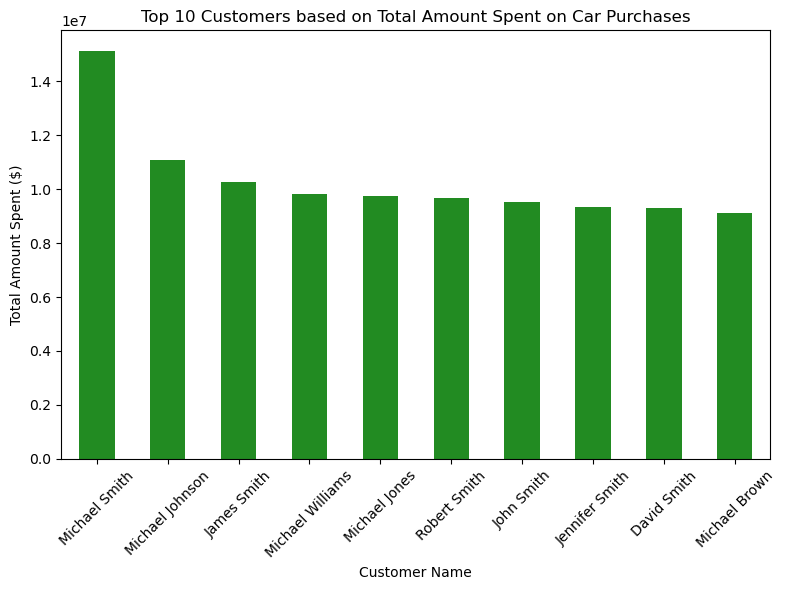

In [25]:
customer_spending = df.groupby('Customer Name')['Sale Price'].sum()
top_customers = customer_spending.sort_values(ascending=False).head(10) 
plt.figure(figsize=(8, 6))
top_customers.plot(kind='bar', color='forestgreen')
plt.title('Top 10 Customers based on Total Amount Spent on Car Purchases')
plt.xlabel('Customer Name')
plt.ylabel('Total Amount Spent ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The top customers, including Michael Smith, Michael Johnson, and James Smith, contribute significantly to the dealership's total sales revenue. Their substantial spending indicates high-value customers who may exhibit loyalty and repeat purchasing behavior. Analyzing their preferences and purchasing patterns can inform targeted marketing strategies and product offerings, fostering stronger customer relationships and driving sustainable business growth.

#### Bottom 10 Customers

In [26]:
customer_spendings = df.groupby('Customer Name')['Sale Price'].sum()
bottom_customers = customer_spendings.sort_values(ascending=False).tail(10)  


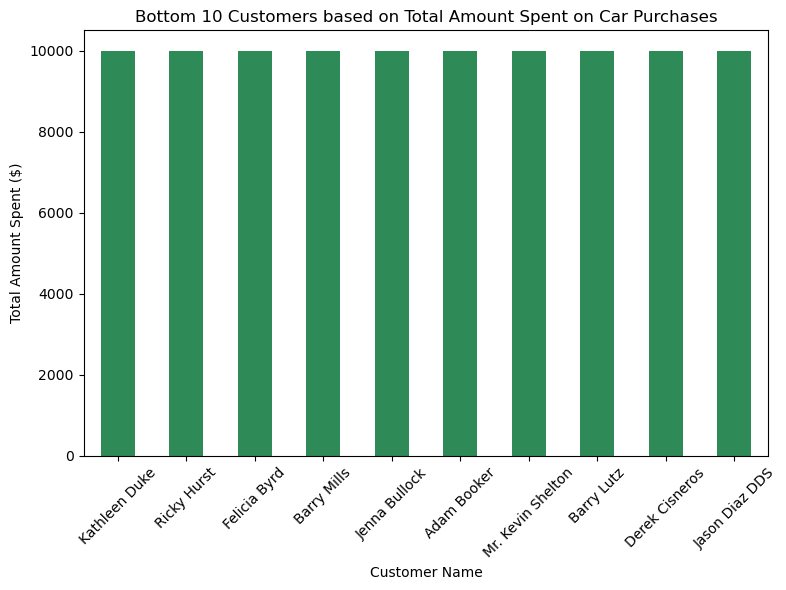

In [27]:
bottom_customers = customer_spendings.sort_values(ascending=False).tail(10)  
plt.figure(figsize=(8, 6))

bottom_customers.plot(kind='bar', color='seagreen')
plt.title('Bottom 10 Customers based on Total Amount Spent on Car Purchases')
plt.xlabel('Customer Name')
plt.ylabel('Total Amount Spent ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bottom 10 customers, based on their car purchases, exhibit similar spending patterns with purchase amounts ranging between 10,000 dollars and 10,001 dollars. This suggests that these customers may have made relatively smaller purchases compared to others in the dataset.

### SUMMARY

-- Sales Price Variability: The average sales price of 30,018.37 dollars with a standard deviation of 11,543.807 dollars indicates significant variability in sales prices, suggesting diverse customer preferences and purchasing power.



-- Sales Trends: December 2022 recorded the highest sales (2,688,302,487 dollars), with relatively consistent levels observed throughout, except for a significant drop in May 2023 (87,068,106 dollars).



-- Top Performing Salespersons: Salespersons like Michael Smith, Michael Johnson, and James Smith have contributed significantly to total sales revenue, demonstrating exceptional sales performance.



-- Bottom Performing Salespersons: Some salespersons have made modest sales, indicating potential for improvement in their sales strategies and performance.



-- Honda emerges as the leading car make with total sales reaching $6,314,240,349.



--  Preferred Car Models: The Silverado emerges as the most preferred car model among customers, with a high sales count. However, the Corolla stands out with the highest average sale price, suggesting different customer preferences for each model.



--  Commission Rate and Commission Earned: A moderate positive correlation coefficient of 0.59 between commission rate and commission earned suggests that higher commission rates tend to result in higher earnings for salespersons.



-- Car Year and Sale Price Correlation: There is a very weak negative correlation (-0.00052) between car year and sale price, indicating that the year the car was made does not significantly affect its sale price.



--  Top Customers: High-value customers like Michael Smith and Michael Johnson contribute significantly to total sales revenue, emphasizing their importance to the dealership.



--  Bottom Customers: Customers with lower purchase amounts may represent a segment with different needs or preferences, requiring targeted marketing or promotional efforts.

### RECOMMENDATIONS

The Company Should : 


-- Focus on stocking and promoting the most preferred car models like the Silverado while also considering the profitability of higher-priced models like the Corolla. Adjust inventory levels and marketing efforts accordingly to meet customer demand. Also, consider introducing new car models, financing options, or value-added services to attract and retain customers.



-- Stay informed about market trends, customer preferences, and competitor activities through regular market research and trend analysis. Use these insights to adapt sales strategies and stay ahead of market changes.



-- Develop targeted marketing campaigns to promote high-demand car models and attract new customers. Utilize digital marketing channels to reach potential customers effectively and track campaign performance.



--  Establish recognition programs that acknowledge the achievements of top salespersons, such as "Salesperson of the Month" or "Top Sales Performer of the Quarter, also develop incentive programs that provide rewards for meeting or exceeding sales targets. 



-- Provide additional training and support to bottom-performing salespersons to improve their sales effectiveness.Offer training, coaching, and mentorship opportunities to help these individuals enhance their sales skills and overcome any performance barriers.


--  Strengthen relationships with customers by offering personalized services, loyalty programs, and incentives. Implement customer feedback mechanisms to gather insights and tailor offerings to meet their evolving needs.